In [ ]:
# Install necessary modules
!pip install pycaret

In [ ]:
!pip install streamlit

In [1]:
# Import necessary modules
from pycaret.classification import *
import streamlit as st
import pandas as pd
import numpy as np

In [3]:
# Load data
stroke_df = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df.head(10)

,Gender,Age,Hypertension,Heart_disease,Ever_married,Work_type,Residence_type,Avg_glucose_level,Bmi,Smoking_status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
len(stroke_df[stroke_df['Stroke']==0])

4861

In [6]:
len(stroke_df[stroke_df['Stroke']==1])

249

In [7]:
# find the minimum of each column
minValues = print(stroke_df.min())

Gender                 Female
Age                      0.08
Hypertension                0
Heart_disease               0
Ever_married               No
Work_type            Govt_job
Residence_type          Rural
Avg_glucose_level       55.12
Bmi                      10.3
Smoking_status        Unknown
Stroke                      0
dtype: object


In [8]:
# find the minimum of each column
maxValues = print(stroke_df.max())

Gender                  Other
Age                      82.0
Hypertension                1
Heart_disease               1
Ever_married              Yes
Work_type            children
Residence_type          Urban
Avg_glucose_level      271.74
Bmi                      97.6
Smoking_status         smokes
Stroke                      1
dtype: object


In [9]:
stroke_df.describe()

,Age,Hypertension,Heart_disease,Avg_glucose_level,Bmi,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_disease      5110 non-null   int64  
 4   Ever_married       5110 non-null   object 
 5   Work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   Avg_glucose_level  5110 non-null   float64
 8   Bmi                4909 non-null   float64
 9   Smoking_status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [13]:
#Applying preprocessing techniques
stroke_df_model = setup(stroke_df, target = 'Stroke', session_id = 123, use_gpu = True, fix_imbalance = True,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True)

,Description,Value
0,session_id,123
1,Target,Stroke
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5110, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
2022-09-28 19:13:47.890 INFO    logs: create_model_container: 0
INFO:logs:master_model_container: 0
2022-09-28 19:13:47.903 INFO    logs: master_model_container: 0
INFO:logs:display_container: 1
2022-09-28 19:13:47.907 INFO    logs: display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Stroke',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nume

In [14]:
stroke_df_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9494,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.031
lightgbm,Light Gradient Boosting Machine,0.9354,0.8092,0.0497,0.1194,0.0695,0.0437,0.0477,0.564
rf,Random Forest Classifier,0.9340,0.8227,0.0939,0.1851,0.1237,0.0938,0.0998,2.225
et,Extra Trees Classifier,0.9326,0.8167,0.0772,0.1693,0.1052,0.0748,0.0817,1.669
gbc,Gradient Boosting Classifier,0.9315,0.8153,0.1099,0.1909,0.1392,0.1063,0.1108,3.323
ada,Ada Boost Classifier,0.9021,0.8150,0.2646,0.1844,0.2158,0.1661,0.1697,0.924
dt,Decision Tree Classifier,0.8988,0.5678,0.1994,0.1398,0.1628,0.1110,0.1137,0.301
knn,K Neighbors Classifier,0.8090,0.6985,0.4699,0.1268,0.1994,0.1301,0.1668,0.570
lr,Logistic Regression,0.7259,0.8348,0.8067,0.1345,0.2303,0.1572,0.2522,0.355
ridge,Ridge Classifier,0.7237,0.0000,0.8123,0.1341,0.2300,0.1568,0.2528,0.147


INFO:logs:create_model_container: 14
2022-09-28 19:16:31.780 INFO    logs: create_model_container: 14
INFO:logs:master_model_container: 14
2022-09-28 19:16:31.787 INFO    logs: master_model_container: 14
INFO:logs:display_container: 2
2022-09-28 19:16:31.791 INFO    logs: display_container: 2
INFO:logs:DummyClassifier(constant=None, random_state=123, strategy='prior')
2022-09-28 19:16:31.797 INFO    logs: DummyClassifier(constant=None, random_state=123, strategy='prior')
INFO:logs:compare_models() succesfully completed......................................
2022-09-28 19:16:31.801 INFO    logs: compare_models() succesfully completed......................................


In [16]:
stroke_df_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9302,0.8636,0.1667,0.2308,0.1935,0.1580,0.1603
1,0.9358,0.8492,0.1111,0.2222,0.1481,0.1186,0.1264
2,0.9358,0.8090,0.0556,0.1429,0.0800,0.0533,0.0598
3,0.9330,0.8405,0.0556,0.1250,0.0769,0.0475,0.0517
4,0.9441,0.8419,0.1667,0.3750,0.2308,0.2062,0.2247
5,0.9330,0.8132,0.1053,0.2222,0.1429,0.1126,0.1212
6,0.9300,0.8112,0.0000,0.0000,0.0000,-0.0291,-0.0326
7,0.9300,0.7697,0.0556,0.1111,0.0741,0.0419,0.0446
8,0.9328,0.8670,0.1111,0.2000,0.1429,0.1108,0.1160


INFO:logs:create_model_container: 16
2022-09-28 19:19:50.618 INFO    logs: create_model_container: 16
INFO:logs:master_model_container: 16
2022-09-28 19:19:50.640 INFO    logs: master_model_container: 16
INFO:logs:display_container: 4
2022-09-28 19:19:50.649 INFO    logs: display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
2022-09-28 19:19:50.672 INFO    logs: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', 

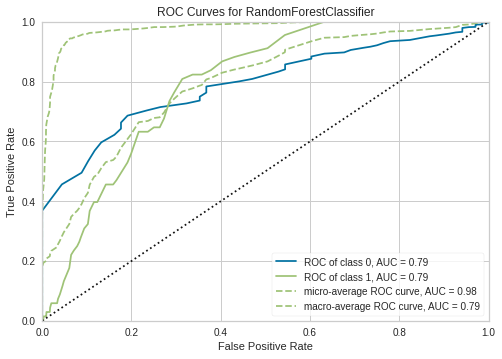

INFO:logs:Visual Rendered Successfully
2022-09-28 19:20:09.396 INFO    logs: Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................
2022-09-28 19:20:09.555 INFO    logs: plot_model() succesfully completed......................................


In [17]:
plot_model(stroke_df_model)

In [18]:
save_model(stroke_df_model, 'stroke_deployment_model')

INFO:logs:Initializing save_model()
2022-09-28 19:20:21.020 INFO    logs: Initializing save_model()
INFO:logs:save_model(model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), model_name=stroke_deployment_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Stroke',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [21]:
#Deploying the trained model with streamlit
from pycaret.classification import load_model, predict_model
import streamlit as st
import pandas as pd
import numpy as np

model = load_model('stroke_deployment_model')

def predict(model, input_df):
    predictions_df = predict_model(estimator=model, data=input_df)
    predictions = predictions_df['Label'][0]
    return predictions

def run():

    from PIL import Image
    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?",
    ("Online", "Batch"))

    st.sidebar.info('This framework is created to predict stroke attacks')

    st.title("Stroke Attacks Predictive Framework")

    if add_selectbox == 'Online':

        Gender = st.selectbox('Gender', ['male', 'female', 'Other'])
        Age = st.sidebar.slider('Age', min_value=0.5, max_value=100.0, value=15.0, step = 0.5)
        Hypertension = st.selectbox('Hypertension', ['0', '1'])
        Heart_disease = st.selectbox('Heart_disease', ['0', '1'])
        Ever_married = st.text_input("Ever_married", 'No')
        Work_type = st.text_input("Work_type", 'Govt_job')
        Residence_type = st.text_input("Residence_type", 'Urban')
        Avg_glucose_level = st.number_input('Avg_glucose_level', min_value=10.00, max_value=400.00, value=70.00)
        Bmi = st.number_input('Bmi', min_value=10.00, max_value=200.00, value=30.00)
        Smoking_status = st.text_input("Smoking_status", 'Unknown')

        output=""

        input_dict = {'Gender' : Gender, 'Age' : Age, 'Hypertension' : Hypertension, 'Heart_disease' : Heart_disease, 'Ever_married' : Ever_married, 'Work_type' : Work_type, 
                      'Residence_type' : Residence_type,'Avg_glucose_level' : Avg_glucose_level,'Bmi' : Bmi,'Smoking_status' : Smoking_status}
        input_df = pd.DataFrame([input_dict])

        if st.button("Predict"):
            output = predict(model=model, input_df=input_df)
            output = '$' + str(output)

        st.success('The output is {}'.format(output))

    if add_selectbox == 'Batch':

        file_upload = st.file_uploader("Upload csv file for predictions", type=["csv"])

        if file_upload is not None:
            data = pd.read_csv(file_upload)
            predictions = predict_model(estimator=model,data=data)
            st.write(predictions)

if __name__ == '__main__':
    run()

INFO:logs:Initializing load_model()
2022-09-28 19:38:24.963 Initializing load_model()
INFO:logs:load_model(model_name=stroke_deployment_model, platform=None, authentication=None, verbose=True)
2022-09-28 19:38:24.969 load_model(model_name=stroke_deployment_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
